Adaptado por Bruno Menezes (https://github.com/brunoleomenezes) e será utilizado apenas para fins acadêmicos.

In [1]:
import cv2
import dlib
import numpy as np
from io import BytesIO
from PIL import Image as Img
import matplotlib.pyplot as plt
from scipy.spatial import distance as dist
from IPython.display import clear_output, Image, display

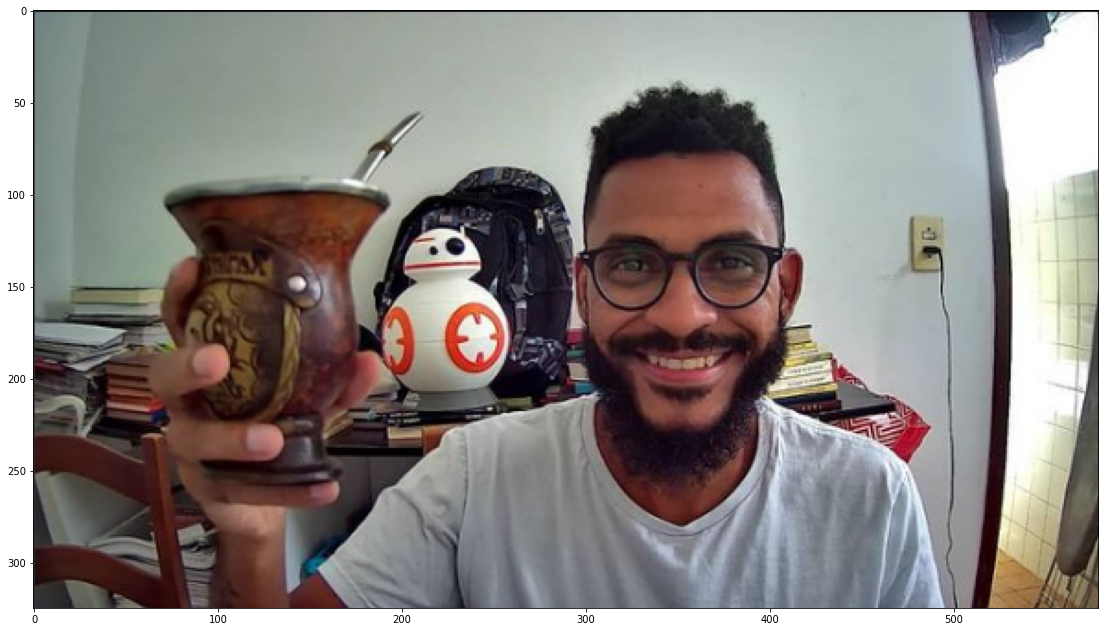

In [2]:
figura = cv2.imread("/content/drive/MyDrive/Curso_Visao/mate.png")
figura = cv2.cvtColor(figura, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(21,11))
plt.imshow(figura)

In [3]:
hog = "/content/drive/MyDrive/Curso_Visao/shape_predictor_68_face_landmarks.dat"
nosso_class = dlib.shape_predictor(hog)
sensor_rosto = dlib.get_frontal_face_detector()

#HOG - Histograma de Gradiente Orientado

In [4]:
def anotar_rosto(figura):
    retangulares = sensor_rosto(figura, 1)
    
    if len(retangulares) == 0:
        return None
    
    for k, d in enumerate(retangulares):
        print("Encontrado " + str(k))
        cv2.rectangle(figura, (d.left(), d.top()), (d.right(), d.bottom()), (255, 255, 0), 2)
    
    return figura

Encontrado 0


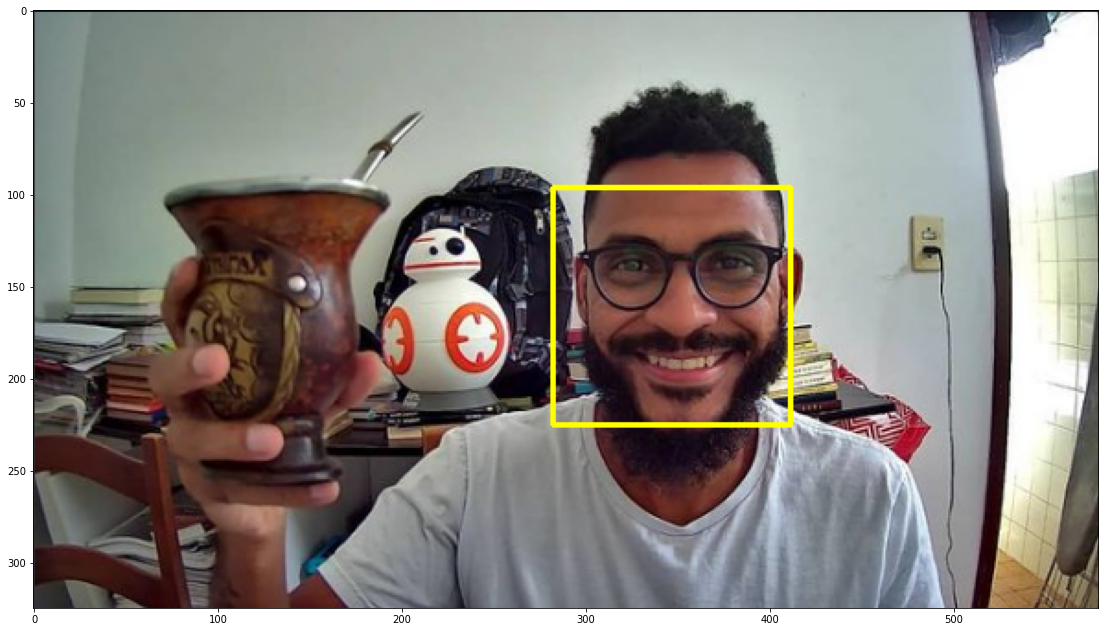

In [5]:
figuraanot = figura.copy()
figuraanot = anotar_rosto(figuraanot)
plt.figure(figsize=(21,11))
plt.imshow(figuraanot)

In [6]:
def facespontos(figura):
    retangulares = sensor_rosto(figura, 1)
    
    if len(retangulares) == 0:
        return None
    
    marcas = []
    
    for ret in retangulares:
        marcas.append(np.matrix([[p.x, p.y] for p in nosso_class(figura,ret).parts()]))
    
    return marcas
  
marcas_faces = facespontos(figura)
len(marcas_faces)

1

In [7]:
len(marcas_faces[0])

68

In [8]:
def motrarmarcasfaces(figura, marcas):
    
    for marco in marcas:
        for idx, ponto in enumerate(marco):
            centroide = (ponto[0,0], ponto[0,1])
            cv2.circle(figura, centroide, 3, (255,255,0), -1)
    return figura

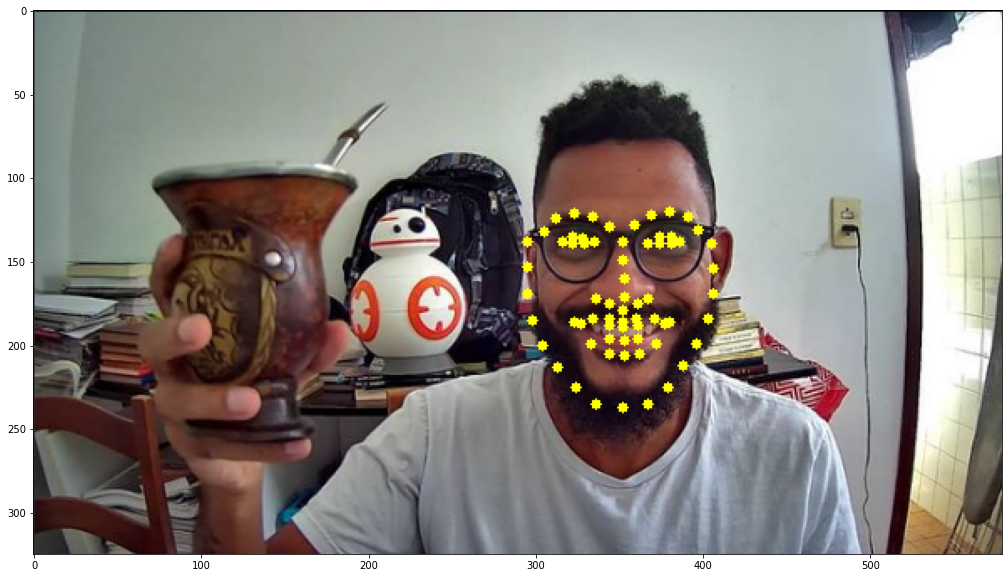

In [9]:
figuraanot = figura.copy()
figuraanot = motrarmarcasfaces(figuraanot, marcas_faces)
plt.figure(figsize=(20,10))
plt.imshow(figuraanot)

In [10]:
def figurapadrao(frame):
    frame = cv2.resize(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB), (250, 150)) #500 400
    return frame

In [11]:
def exibir_video(frame):
    img = Img.fromarray(frame, "RGB")
    buffer = BytesIO()
    img.save(buffer, format="JPEG")
    display(Image(data=buffer.getvalue()))
    clear_output(wait=True)

In [12]:
def bocaorazao(pontbocao):
    a = dist.euclidean(pontbocao[3], pontbocao[9])
    b = dist.euclidean(pontbocao[2], pontbocao[10])
    c = dist.euclidean(pontbocao[4], pontbocao[8])
    d = dist.euclidean(pontbocao[0], pontbocao[6])
    
    aspecto_razao = (a + b + c)/(3.0*d)
    
    return aspecto_razao

In [13]:
hog = "/content/drive/MyDrive/Curso_Visao/shape_predictor_68_face_landmarks.dat"
nosso_class = dlib.shape_predictor(hog)
sensor_rosto = dlib.get_frontal_face_detector()

In [14]:
def convexabocao(figura, marcas):
    retangulares = sensor_rosto(figura, 1)
    
    if len(retangulares) == 0:
        return None
    
    for idx, ret in enumerate(retangulares):
        marco = marcas[idx]
        
        pontos = cv2.convexHull(marco[BOCARRA])
        cv2.drawContours(figura, [pontos], 0, (0,255,0), 2)

    return figura

In [15]:
def facespontos(figura):
    retangulares = sensor_rosto(figura, 1)
    
    if len(retangulares) == 0:
        return None
    
    marcas = []
    
    for ret in retangulares:
        marcas.append(np.matrix([[p.x, p.y] for p in nosso_class(figura,ret).parts()]))
    
    return marcas


In [16]:
BOCARRA = list(range(48, 61))
try:
    ar_max = 0
    video = cv2.VideoCapture("/content/drive/MyDrive/Curso_Visao/bruno03.mov")
    while(True):
        captura_ok, frame = video.read()
        if captura_ok:
            frame = figurapadrao(frame)
            marcas_faces = facespontos(frame)
            
            if marcas_faces is not None:
                ar_boca = bocaorazao(marcas_faces[0][BOCARRA])
                ar_boca = round(ar_boca, 3) #Precisão
                
                if ar_boca > ar_max:
                    ar_max = ar_boca
                
                info = "boca " + str(ar_boca) + " max " + str(ar_max)
                
                frame = convexabocao(frame, marcas_faces)
                cv2.putText(frame, info, (10, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (455,455,0), 1) 
            
            exibir_video(frame)
            
except KeyboardInterrupt:
    video.release()
    print("Parou")

Parou


In [17]:
DIREITOOLHO = list(range(36,42))
ESQUERDOOLHO= list(range(42,48))

def aspecto_razao_olhos(pontos_olhos):
    
    a = dist.euclidean(pontos_olhos[1], pontos_olhos[5])
    b = dist.euclidean(pontos_olhos[2], pontos_olhos[4])
    c = dist.euclidean(pontos_olhos[0], pontos_olhos[3])
    
    aspecto_razao = (a + b)/(2.0 * c)
    
    return aspecto_razao

In [18]:
def registrarpontosconvexo(figura, marcas):
    retangulares = sensor_rosto(figura, 1)
    
    if len(retangulares) == 0:
        return None
    
    for idx, ret in enumerate(retangulares):
        marco = marcas[idx]
        
        pontos = cv2.convexHull(marco[ESQUERDOOLHO])
        cv2.drawContours(figura, [pontos], 0, (0,256,0), 2)
        
        pontos = cv2.convexHull(marco[DIREITOOLHO])
        cv2.drawContours(figura, [pontos], 0, (0,256,0), 2)
    
    return figura

In [19]:
try:
    min_olho_esq = 1
    min_olho_dir = 1
    
    video = cv2.VideoCapture("/content/drive/MyDrive/Curso_Visao/bruno04.mov")
    
    while(True):
        captura_ok, frame = video.read()
        frame = figurapadrao(frame)
        
        marcas_faces = facespontos(frame)
        
        if marcas_faces is not None:
            ar_olho_esq = aspecto_razao_olhos(marcas_faces[0][ESQUERDOOLHO])
            ar_olho_dir = aspecto_razao_olhos(marcas_faces[0][DIREITOOLHO])
            
            ar_olho_esq = round(ar_olho_esq, 3)
            ar_olho_dir = round(ar_olho_dir, 3)
            
            if ar_olho_esq < min_olho_esq:
                min_olho_esq = ar_olho_esq
                
            if ar_olho_dir < min_olho_dir:
                min_olho_dir = ar_olho_dir
            
            info_oe = "esquerda " + str(ar_olho_esq) + " min " + str(min_olho_esq)
            info_od = "direita " + str(ar_olho_dir) + " min " + str(min_olho_dir)
            
            frame = registrarpontosconvexo(frame, marcas_faces)
            
            cv2.putText(frame, info_oe, (21, 51), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (455,455,0), 2)
            cv2.putText(frame, info_od, (21, 81), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (455,455,0), 2)
            
        exibir_video(frame)
        
except KeyboardInterrupt:
    video.release()
    print("Parou")

Parou
